In [3]:
using Images, ImageFiltering, FileIO, ImageView, ImageMorphology, ColorTypes, ImageDraw, Colors

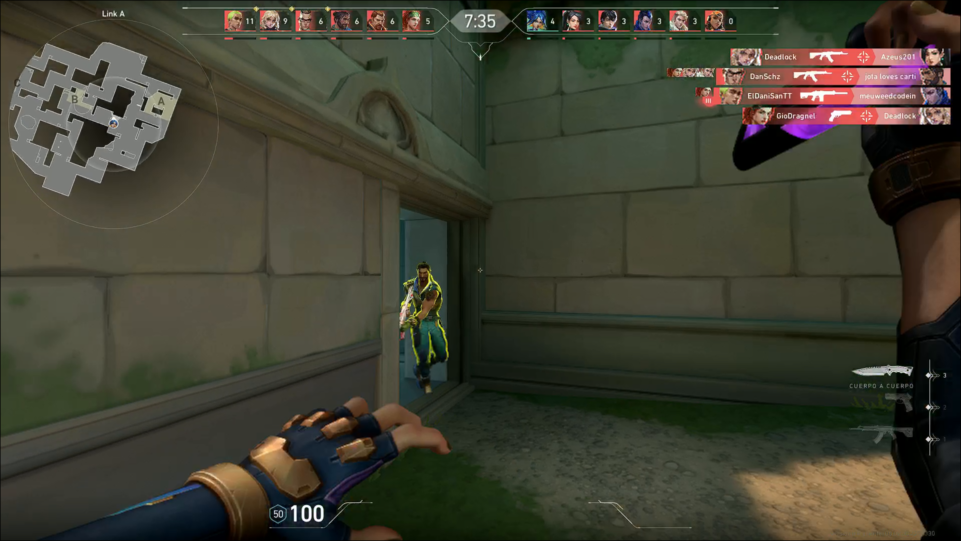

In [37]:
img = load("frame23_193.png")

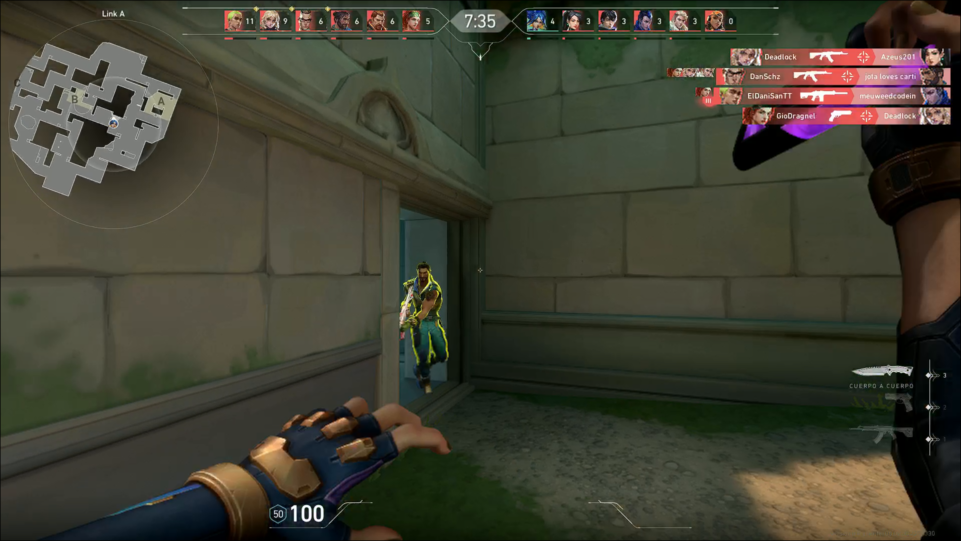

In [38]:
img_hsv = HSV.(img)

In [46]:
# Define the yellow color range in HSV, ensuring the type matches img_hsv pixels
yellow_low = HSV{Float32}(40, 100/255, 155/255)


In [55]:
yellow_high = HSV{Float32}(71, 255/255, 255/255)

In [58]:
mask = map(img_hsv) do pixel
    h, s, v = pixel.h, pixel.s, pixel.v
    h_low, s_low, v_low = yellow_low.h, yellow_low.s, yellow_low.v
    h_high, s_high, v_high = yellow_high.h, yellow_high.s, yellow_high.v

    h_in_range = h_low <= h <= h_high
    s_in_range = s_low <= s <= s_high
    v_in_range = v_low <= v <= v_high

    return h_in_range && s_in_range && v_in_range ? 1 : 0
end

1080×1920 Matrix{Int64}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 ⋮              ⋮              ⋮        ⋱        ⋮              ⋮           
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  

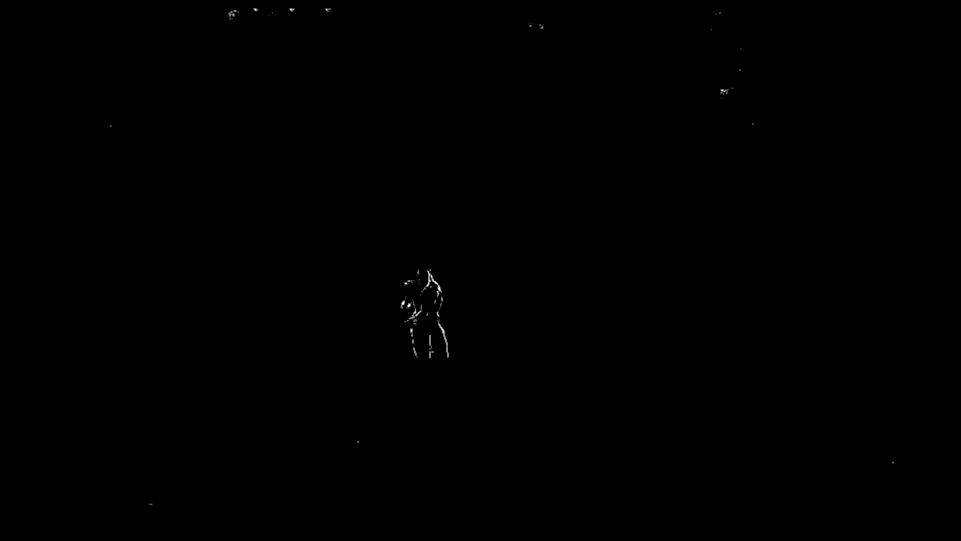

In [59]:
# Convert mask to grayscale image for morphological operations
mask_gray = Gray.(mask)

In [61]:
se = centered(Bool[
    0 0 1 1 1 0 0
    0 1 1 1 1 1 0
    1 1 1 1 1 1 1
    1 1 1 1 1 1 1
    1 1 1 1 1 1 1
    0 1 1 1 1 1 0
    0 0 1 1 1 0 0
])

7×7 OffsetArray(::Matrix{Bool}, -3:3, -3:3) with eltype Bool with indices -3:3×-3:3:
 0  0  1  1  1  0  0
 0  1  1  1  1  1  0
 1  1  1  1  1  1  1
 1  1  1  1  1  1  1
 1  1  1  1  1  1  1
 0  1  1  1  1  1  0
 0  0  1  1  1  0  0

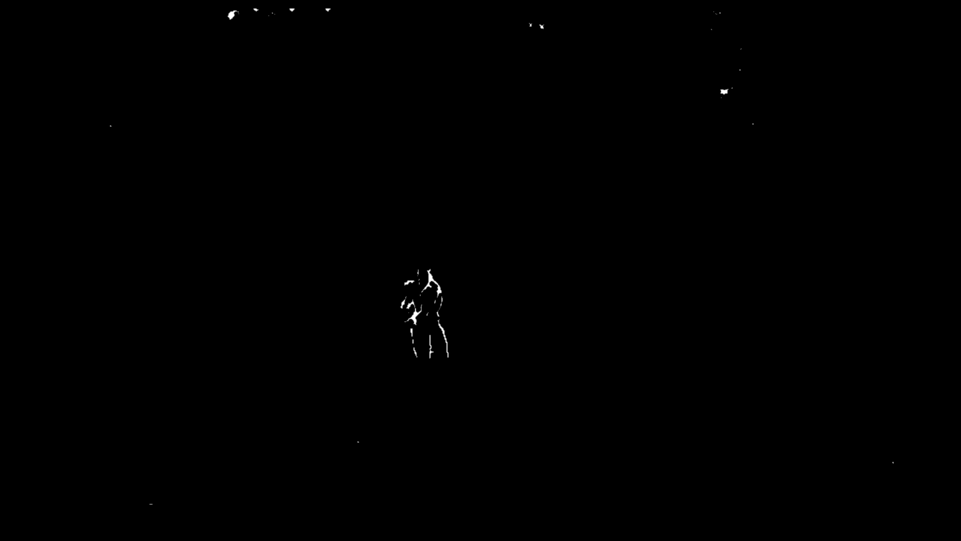

In [78]:
#img_erode = @. Gray(mask_gray < 0.1); # keeps white objects white
img_erosion1 = closing(mask_gray,se)